In [108]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az

In [109]:
iris_df = pd.read_csv('i200569 Dania Jawad - iris.csv')


iris_df.head(5)              #will print first 5 rows of the iris dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


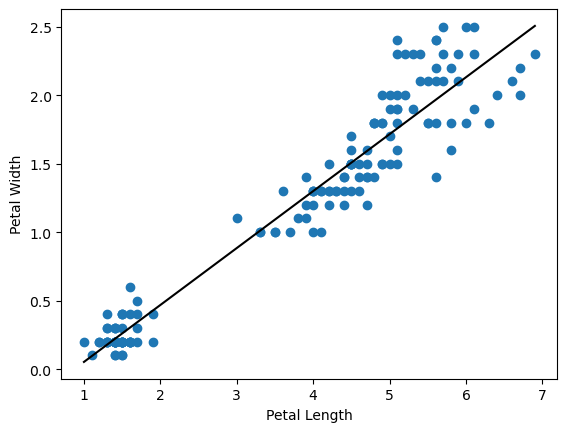

In [110]:
#getting the data from the file's columns
pet_len = iris_df['petal_length']
pet_wid = iris_df['petal_width']

#calculating regression line
m, intercept = np.polyfit(pet_len, pet_wid, 1)
x = np.array([min(pet_len), max(pet_len)])
y = m * x + intercept

# Plot the data and line
plt.scatter(pet_len, pet_wid)
plt.plot(x,y, color='black')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

In [115]:
  
with pm.Model() as model:
    #priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=1)
    
    #expected value of outcome
    mu = alpha + beta * pet_len
    
    #likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=pet_wid)
    
    #inference
    iris_data = pm.sample(5000, tune=3000, return_inferencedata=True,chains=2, target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 3_000 tune and 5_000 draw iterations (6_000 + 10_000 draws total) took 37 seconds.


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

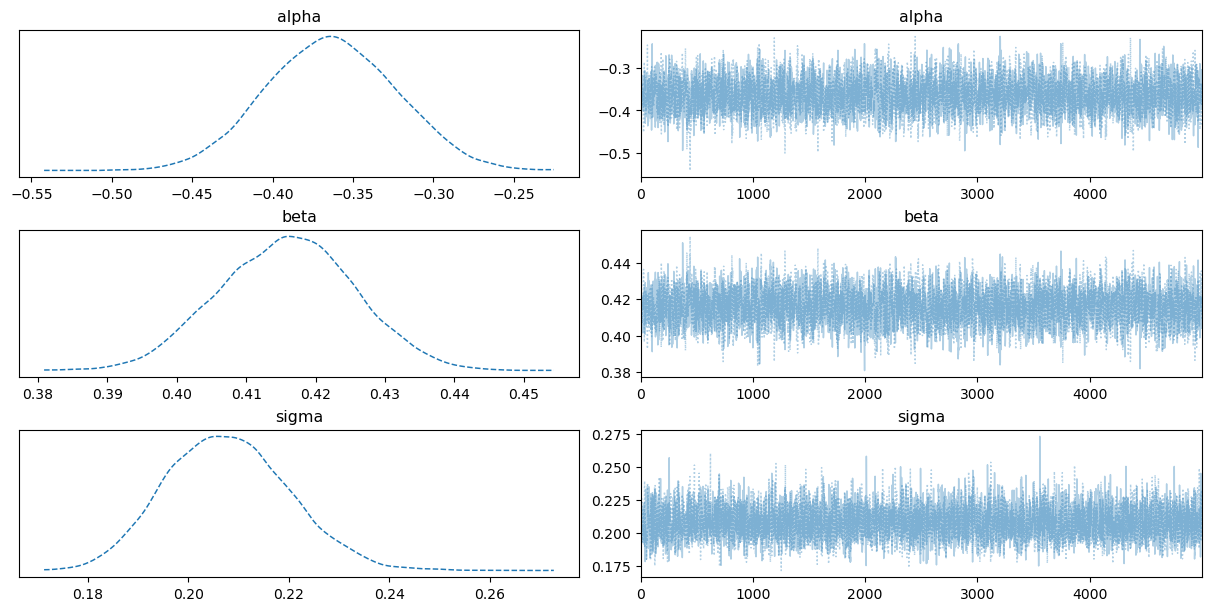

In [116]:
az.plot_trace(iris_data, var_names=['alpha', 'beta', 'sigma'], combined = True)
# plt.savefig('Model1.png', dpi=300)

In [ ]:

# az.plot_posterior(iris_data, var_names=['alpha', 'beta'], hdi_prob= 0.94)
# plt.show()

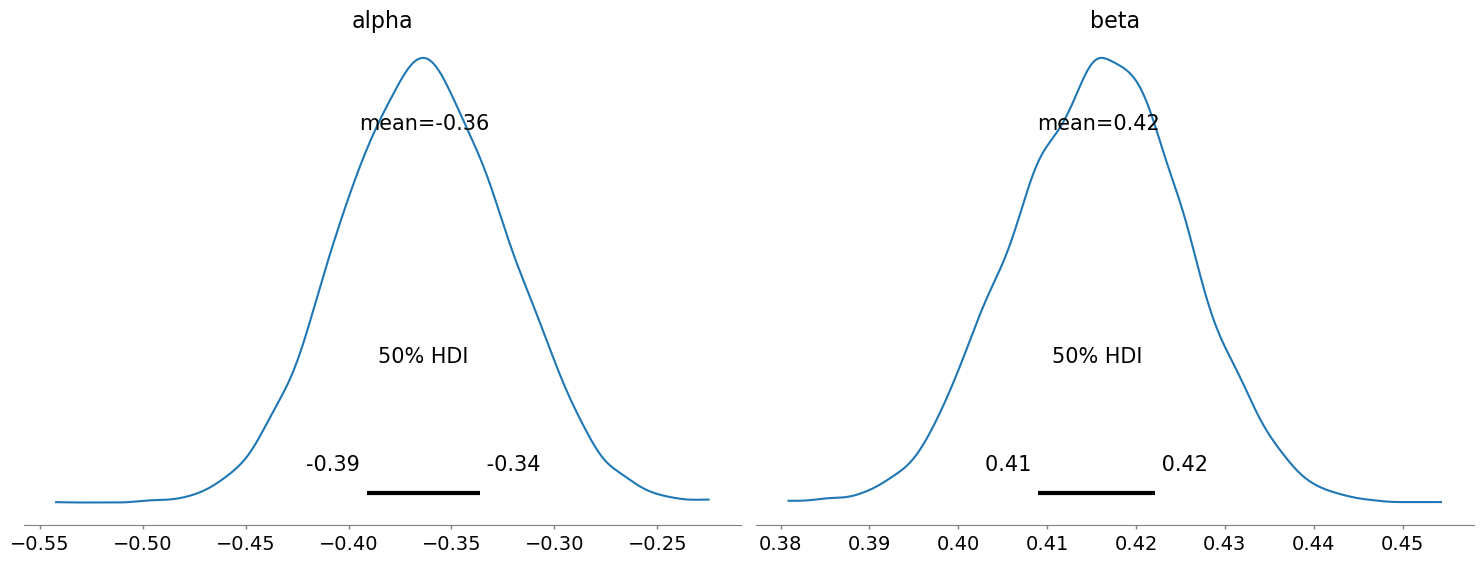

In [149]:

# az.plot_posterior(iris_data, var_names=['alpha', 'beta'], hdi_prob=0.5)
# plt.show()

C:\Users\Hp\.conda\envs\pm3bap\lib\site-packages\arviz\plots\pairplot.py:185: UserWarning: plot_kwargs will be deprecated. Please use scatter_kwargs, kde_kwargs and/or hexbin_kwargs
  warnings.warn(


<AxesSubplot:xlabel='alpha', ylabel='beta'>

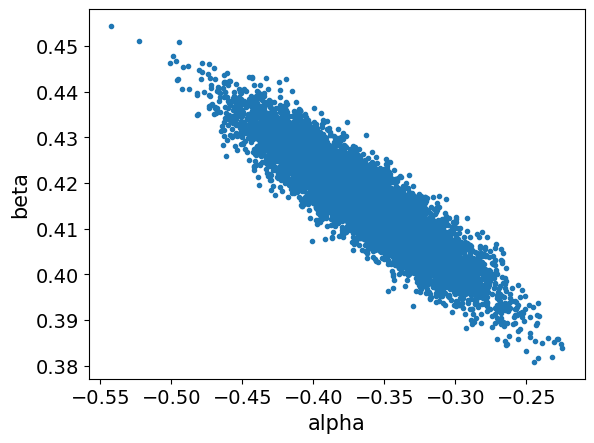

In [160]:
az.plot_pair(iris_data, var_names=['alpha', 'beta'], plot_kwargs={'alpha': 0.1})
# plt.savefig('pairPlot.png', dpi=300)

C:\Users\Hp\AppData\Local\Temp\ipykernel_18580\3743033971.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(pet_len, posterior_g['alpha'][draws].values + posterior_g['beta'][draws].values * pet_len[:,None], c='gray', alpha=0.5)


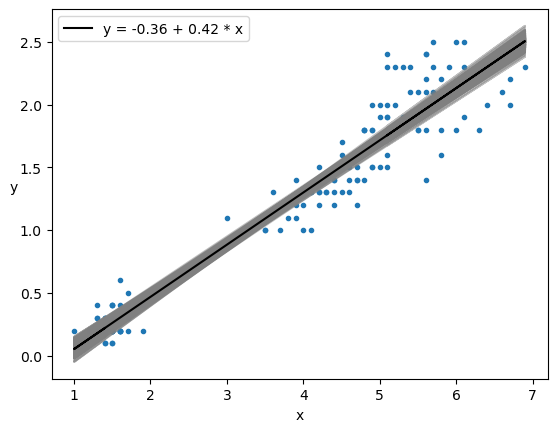

In [118]:
plt.plot(pet_len, pet_wid, 'C0.')

posterior_g = iris_data.posterior.stack(samples={"chain", "draw"})
alpha_m = posterior_g['alpha'].mean().item()
beta_m = posterior_g['beta'].mean().item()

draws = range(0, posterior_g.samples.size, 10)
plt.plot(pet_len, posterior_g['alpha'][draws].values + posterior_g['beta'][draws].values * pet_len[:,None], c='gray', alpha=0.5)

plt.plot(pet_len, alpha_m + beta_m * pet_len, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()
# plt.savefig('posteriorInterpret.png', dpi=300)


In [119]:
ppc = pm.sample_posterior_predictive(iris_data, samples=2000, model=model)

C:\Users\Hp\.conda\envs\pm3bap\lib\site-packages\pymc3\sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


C:\Users\Hp\.conda\envs\pm3bap\lib\site-packages\arviz\stats\stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
C:\Users\Hp\.conda\envs\pm3bap\lib\site-packages\arviz\stats\stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


Text(0, 0.5, 'y')

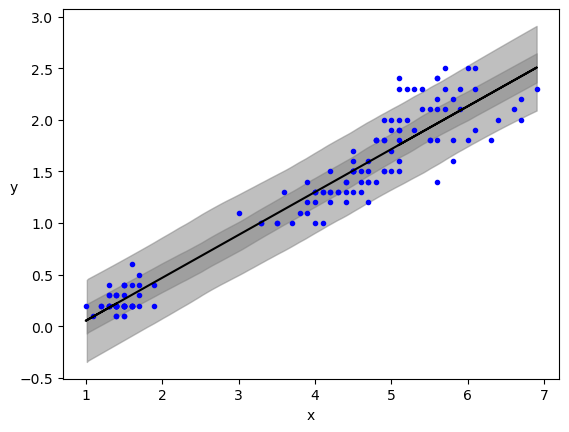

In [120]:
plt.plot(pet_len, pet_wid, 'b.')
plt.plot(pet_len, alpha_m + beta_m * pet_len, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

az.plot_hdi(pet_len, ppc['Y_obs'], hdi_prob=0.5, color='gray')
az.plot_hdi(pet_len, ppc['Y_obs'], color='gray')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
# plt.savefig('HDI.png', dpi=300)

In [154]:
az.summary(iris_data)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.363,0.040,-0.438,-0.288,0.001,0.001,2994.0,4087.0,1.0
beta,0.416,0.010,0.398,0.434,0.000,0.000,2981.0,3976.0,1.0
sigma,0.208,0.012,0.186,0.231,0.000,0.000,4907.0,4825.0,1.0


In [136]:

with pm.Model() as model_t:
    α1 = pm.Normal('α1', mu=0, sd=1)
    β1 = pm.Normal('β1', mu=0, sd=1)
    ϵ1 = pm.HalfCauchy('ϵ1', 10)
    ν1 = pm.Exponential('ν1', 1/30)

    μ1 = pm.Deterministic('μ1', α1 + β1 * pet_len)
    y_pred1 = pm.StudentT('y_pred1', mu=μ1, sd=ϵ1, nu=ν1, observed=pet_wid)
    idata_t = pm.sample(2000,return_inferencedata=True,chains=2, target_accept=0.95)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [ν1, ϵ1, β1, α1]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 28 seconds.


array([[<AxesSubplot:title={'center':'α1'}>,
        <AxesSubplot:title={'center':'α1'}>],
       [<AxesSubplot:title={'center':'β1'}>,
        <AxesSubplot:title={'center':'β1'}>],
       [<AxesSubplot:title={'center':'ϵ1'}>,
        <AxesSubplot:title={'center':'ϵ1'}>],
       [<AxesSubplot:title={'center':'ν1'}>,
        <AxesSubplot:title={'center':'ν1'}>]], dtype=object)

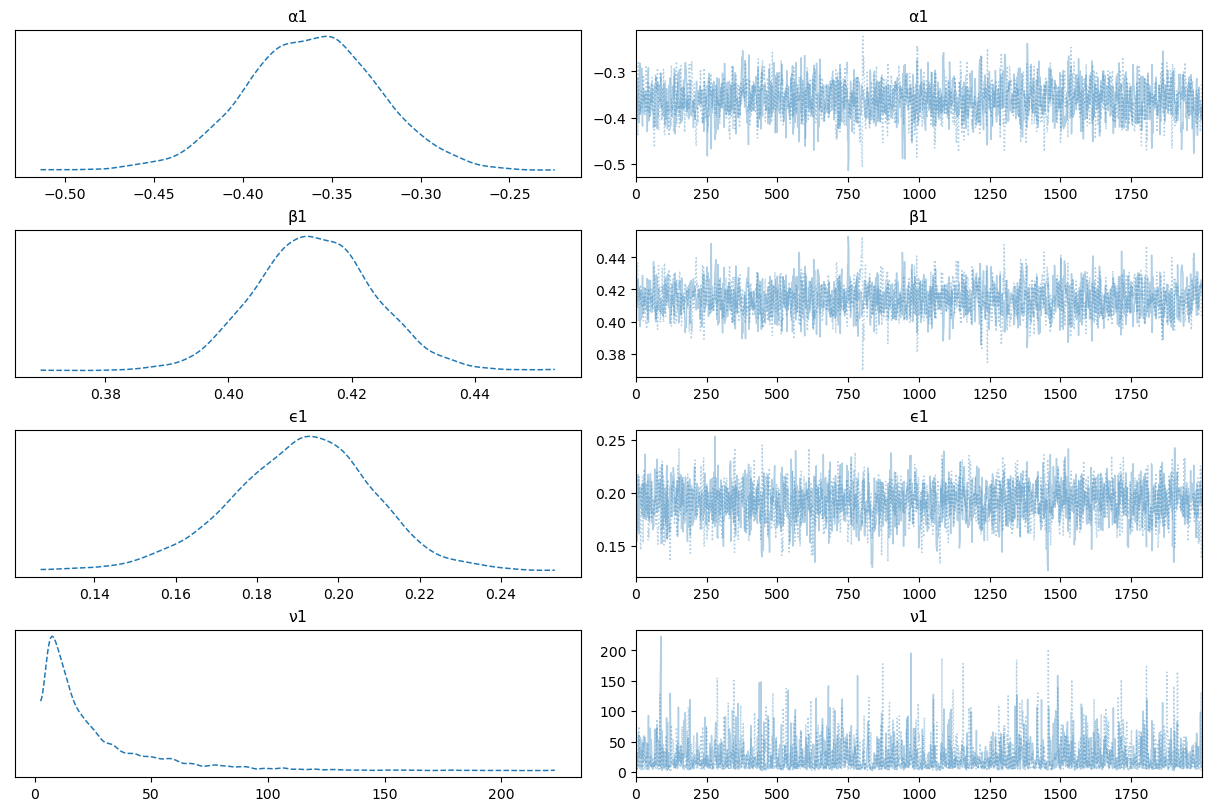

In [137]:
az.plot_trace(idata_t, var_names=['α1', 'β1', 'ϵ1', 'ν1'], combined = True)

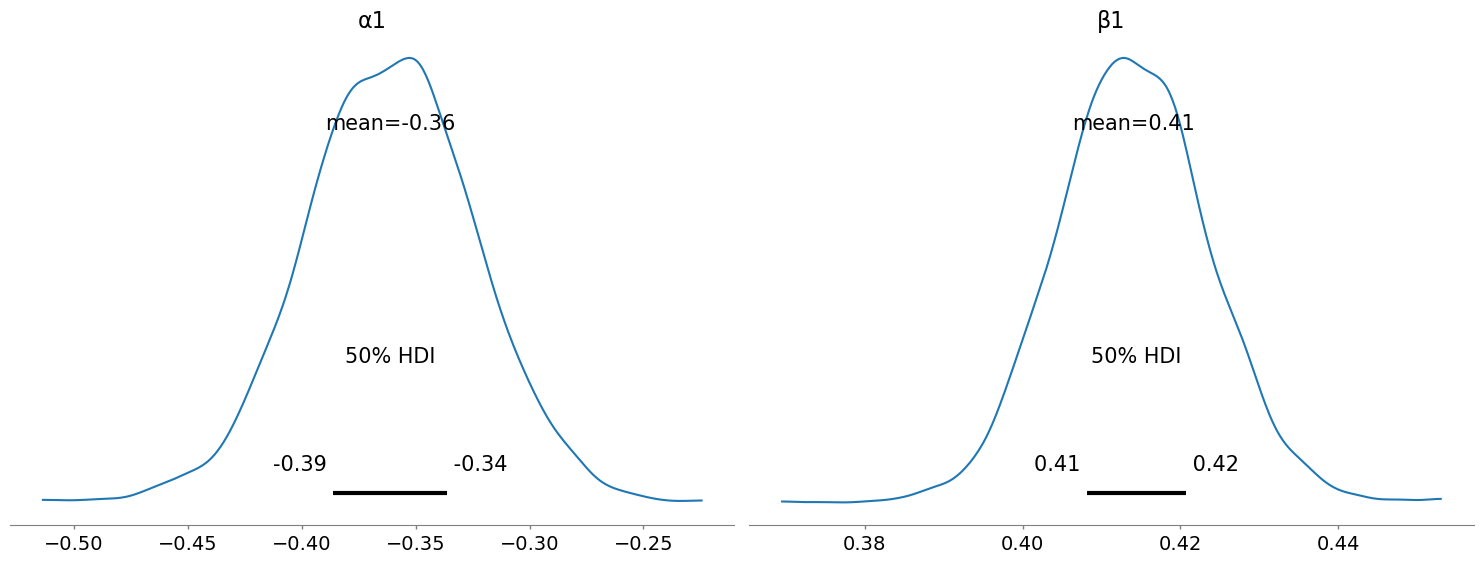

In [158]:
# az.plot_posterior(idata_t, var_names=['α1', 'β1'])
# az.plot_posterior(idata_t, var_names=['α1', 'β1'], hdi_prob=0.5)
# plt.show()

C:\Users\Hp\.conda\envs\pm3bap\lib\site-packages\arviz\plots\pairplot.py:185: UserWarning: plot_kwargs will be deprecated. Please use scatter_kwargs, kde_kwargs and/or hexbin_kwargs
  warnings.warn(


<AxesSubplot:xlabel='α1', ylabel='β1'>

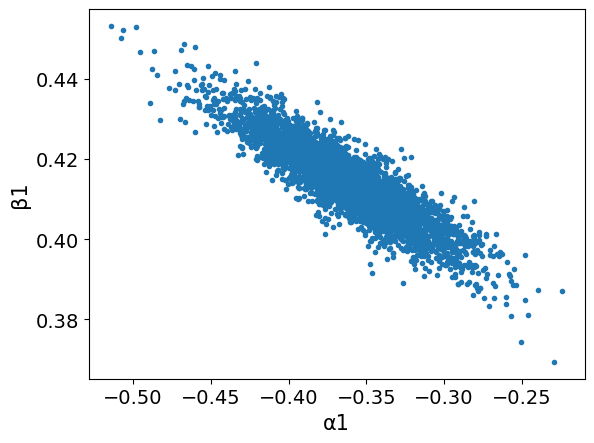

In [157]:
az.plot_pair(idata_t, var_names=['α1', 'β1'], plot_kwargs={'alpha': 0.1})

C:\Users\Hp\AppData\Local\Temp\ipykernel_18580\3532788663.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(pet_len, posterior_g1['α1'][draws1].values + posterior_g1['β1'][draws1].values * pet_len[:,None], c='gray', alpha=0.5)


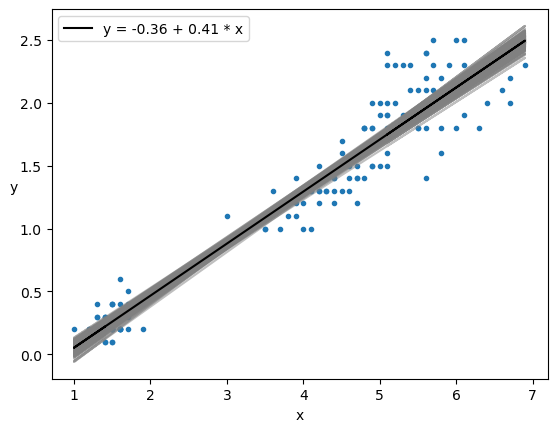

In [139]:
plt.plot(pet_len, pet_wid, 'C0.')

posterior_g1 = idata_t.posterior.stack(samples={"chain", "draw"})
alpha_m1 = posterior_g1['α1'].mean().item()
beta_m1 = posterior_g1['β1'].mean().item()

draws1 = range(0, posterior_g1.samples.size, 10)
plt.plot(pet_len, posterior_g1['α1'][draws1].values + posterior_g1['β1'][draws1].values * pet_len[:,None], c='gray', alpha=0.5)

plt.plot(pet_len, alpha_m1 + beta_m1 * pet_len, c='k',
         label=f'y = {alpha_m1:.2f} + {beta_m1:.2f} * x')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()


In [140]:
ppc1 = pm.sample_posterior_predictive(idata_t, samples=1000, model=model_t)

C:\Users\Hp\.conda\envs\pm3bap\lib\site-packages\pymc3\sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


C:\Users\Hp\.conda\envs\pm3bap\lib\site-packages\arviz\stats\stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
C:\Users\Hp\.conda\envs\pm3bap\lib\site-packages\arviz\stats\stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


Text(0, 0.5, 'y')

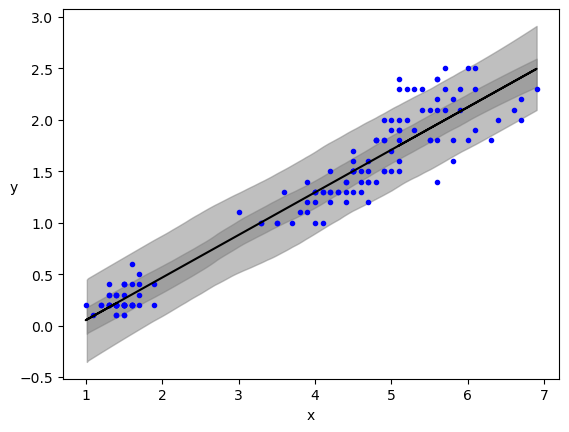

In [141]:
plt.plot(pet_len, pet_wid, 'b.')
plt.plot(pet_len, alpha_m1 + beta_m1 * pet_len, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

az.plot_hdi(pet_len, ppc1['y_pred1'], hdi_prob=0.5, color='gray')
az.plot_hdi(pet_len, ppc1['y_pred1'], color='gray')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
# plt.savefig('HDI.png', dpi=300)

In [142]:
az.summary(idata_t)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α1,-0.361,0.038,-0.431,-0.290,0.001,0.001,1672.0,1862.0,1.0
β1,0.414,0.010,0.397,0.432,0.000,0.000,1647.0,1723.0,1.0
ϵ1,0.191,0.017,0.156,0.222,0.000,0.000,1637.0,1571.0,1.0
ν1,25.002,25.307,2.318,71.693,0.567,0.401,1630.0,1862.0,1.0
μ1[0],0.218,0.026,0.172,0.269,0.001,0.000,1873.0,2053.0,1.0
...,...,...,...,...,...,...,...,...,...
μ1[145],1.792,0.024,1.747,1.837,0.000,0.000,2994.0,2178.0,1.0
μ1[146],1.709,0.022,1.667,1.752,0.000,0.000,3211.0,2329.0,1.0
μ1[147],1.792,0.024,1.747,1.837,0.000,0.000,2994.0,2178.0,1.0
μ1[148],1.874,0.025,1.828,1.922,0.000,0.000,2819.0,1945.0,1.0


In [132]:
x_3 = pet_len
y_3 = pet_wid
x_3 = x_3 - x_3.mean()
y_3 = y_3 - y_3.mean()

In [133]:

with pm.Model() as Rob_model_t:
    α1 = pm.Normal('α1', mu=0, sd=1)
    β1 = pm.Normal('β1', mu=0, sd=1)
    ϵ1 = pm.HalfCauchy('ϵ1', 10)
    ν1 = pm.Exponential('ν1', 1/30)

    μ1 = pm.Deterministic('μ1', α1 + β1 * x_3)
    y_pred1 = pm.StudentT('y_pred1', mu=μ1, sd=ϵ1, nu=ν1, observed=y_3)
    rob_data_t = pm.sample(5000, tune=3000, return_inferencedata=True,chains=2, target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [ν1, ϵ1, β1, α1]


Sampling 2 chains for 3_000 tune and 5_000 draw iterations (6_000 + 10_000 draws total) took 35 seconds.


C:\Users\Hp\.conda\envs\pm3bap\lib\site-packages\arviz\plots\pairplot.py:185: UserWarning: plot_kwargs will be deprecated. Please use scatter_kwargs, kde_kwargs and/or hexbin_kwargs
  warnings.warn(


<AxesSubplot:xlabel='α1', ylabel='β1'>

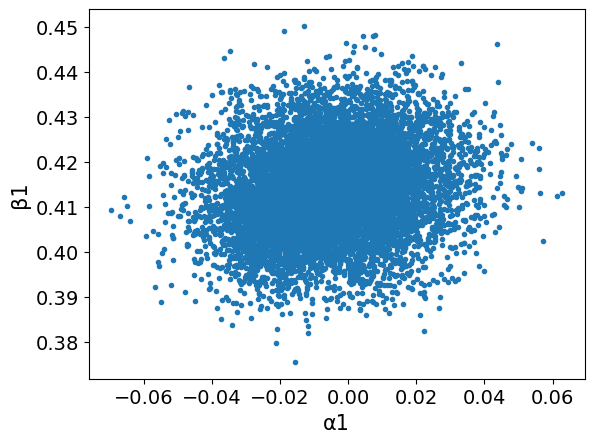

In [134]:
az.plot_pair(rob_data_t, var_names=['α1', 'β1'], plot_kwargs={'alpha': 0.1})

In [135]:
az.summary(rob_data_t)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α1,-0.005,0.017,-0.037,0.028,0.000,0.000,7397.0,6377.0,1.0
β1,0.414,0.010,0.395,0.432,0.000,0.000,7003.0,6181.0,1.0
ϵ1,0.191,0.017,0.159,0.222,0.000,0.000,5365.0,4896.0,1.0
ν1,24.799,24.505,2.436,68.992,0.324,0.229,4843.0,6088.0,1.0
μ1[0],-0.981,0.027,-1.031,-0.930,0.000,0.000,8543.0,6334.0,1.0
...,...,...,...,...,...,...,...,...,...
μ1[145],0.593,0.024,0.546,0.636,0.000,0.000,6399.0,6183.0,1.0
μ1[146],0.510,0.023,0.466,0.551,0.000,0.000,6444.0,6265.0,1.0
μ1[147],0.593,0.024,0.546,0.636,0.000,0.000,6399.0,6183.0,1.0
μ1[148],0.675,0.025,0.626,0.721,0.000,0.000,6370.0,6181.0,1.0


#                                                #Results Interpretation:
                                                
i) The slope and intercepts of both models have been calculated and can be seen above. They show that there exist some outliers which need to be scaled out. For which student t model is used. 
The student t model rules out the outliers in the data set and makes the results more robust as you can see in pair plot displayed at line 134

ii)We have visualized and interpreted the iris dataset by taking its petal width and petal length to interpret the posterior 50% and 94% HDI. The results do lie in this region.

iii)The auto correlation exited between alpha and beta and to remove it the "mean subtraction method" was used as shown above. This made our dataset even more robust and better.
